# **Capstone Project 3**
###Course#3 Machine Learning

Santanu Chandra

email: santanu.chandra@gmail.com

Submission date - 08-09-2025


# **Creating Cohorts of Songs**

**Problem Scenario:**

The customer always looks forward to specialized treatment, whether shopping on an e-commerce website or watching Netflix. The customer desires content that aligns with their preferences. To maintain customer engagement, companies must consistently provide the most relevant information.

Starting with Spotify, a Swedish audio streaming and media service provider, boasts over 456 million active monthly users, including more than 195 million paid subscribers as of September 2022. The company aims to create cohorts of different songs to enhance song recommendations. These cohorts will be based on various relevant features, ensuring that each group contains similar types of songs.

**Problem Objective:**

As a data scientist, you should perform exploratory data analysis and cluster analysis to create cohorts of songs. The goal is to better understand the various factors that create a cohort of songs.

**Data Description:**

The dataset comprises information from Spotify's API regarding all albums by the Rolling Stones available on Spotify. It's crucial to highlight that each song possesses a unique ID.


**Steps to Perform:**

**1.	Initial data inspection and data cleaning:**

      a.   Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import statistics
import operator


**1.a. Load the data**


In [ ]:
# load the data from 'rolling_stones_spotify' into a DataFrame named 'spotify'.
spotify_df = pd.read_csv('rolling_stones_spotify.csv')
# Display the first five rows of the DataFrame using the 'head()' method to provide a quick overview of the dataset structure and content.
spotify_df.head(5)

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


**1.b Summary of the Dataframe**

In [ ]:
# Use the 'info()' method to output a concise summary of the DataFrame, including the number of non-null entries in each column, the data type of each column, and memory usage.
spotify_df.info()

##identify type of dataset
#spotify_df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


**Summary**

*   Type- object 5
*   Type integer 4
*   Type float 9

Total parameters = 18



**1.c Identify missing values**

In [ ]:
# Calculates the total number of missing (null) values in each column using the 'isnull().sum()' method, helping to identify columns that might require cleaning or further investigation due to missing data.
spotify_df.isnull().sum()

,0
Unnamed: 0,0
name,0
album,0
release_date,0
track_number,0
id,0
uri,0
acousticness,0
danceability,0
energy,0


**Observations:**

*   There are 18 columns of data for each of 1610 entries
*   No missing values in any of the columns



In [ ]:
# In case there were missing values

# Drop rows with missing values in key features
features = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo', 'valence','popularity', 'duration_ms']
spotify_df_clean = spotify_df.dropna(subset=features)


In [ ]:
# Generate descriptive statistics for the numerical columns of the 'animes' DataFrame
spotify_df.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


find unique values

In [ ]:
# Calculate the number of unique albums in the spotify_df dataset
len(spotify_df['album'].unique())

90

In [ ]:
# Calculate the number of unique name in the spotify_df dataset
len(spotify_df['name'].unique())

954

In [ ]:
# Calculate the number of unique release data in the spotify_df dataset
len(spotify_df['release_date'].unique())

57

In [ ]:
# Calculate the number of unique id in the spotify_df dataset
len(spotify_df['id'].unique())

1610

In [ ]:
# Calculate the number of unique uri in the spotify_df dataset
len(spotify_df['uri'].unique())

1610

In [ ]:
len(spotify_df['Unnamed: 0'].unique())

1610

**Observations:**


*   The Unnamed: 0 is the number count of the songs , counts from 0 to 1609 - total of 1610 songs
*   The id and and uri are unique to each song
*   There are 90 unique albums in the list
*   There are unique 954 name in the list ? What is the definition of the name ?
*   There are unique 57 release dates, that means multiple albums might have released on the same date





In [ ]:
import statistics

# Calculate the popularity per album
popularity_per_album = spotify_df.groupby('album')['popularity'].count()

# Calculate the mean popularity per album
mean_popularity_per_album = popularity_per_album.mean()

# Print the results
mean_popularity_per_album

np.float64(17.88888888888889)

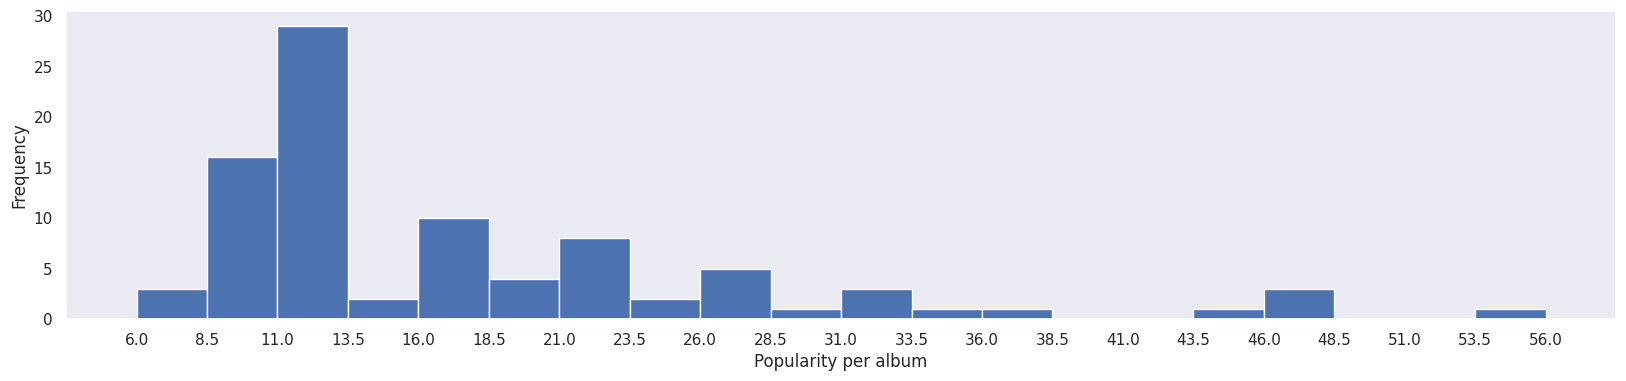

In [ ]:
# Plot the histogram and capture the return values
plt.figure(figsize=(20, 4))
counts, bins, patches = plt.hist(popularity_per_album, bins=20)
# Customize the x-axis labels to show bin edges
plt.xticks(bins)  # Set x-axis ticks to match bin edges
plt.xlabel('Popularity per album')
plt.ylabel('Frequency')
plt.show()


**Observations:**



*   Majority of the albums have popularity between 10-16 with only a few with popularity more than 50.
*   The mean popularity is 20.7
*   The max is 80 (dont see it in the histogram)
*   The mean popularity per album is 17.8






**1.c PLot Distributions**

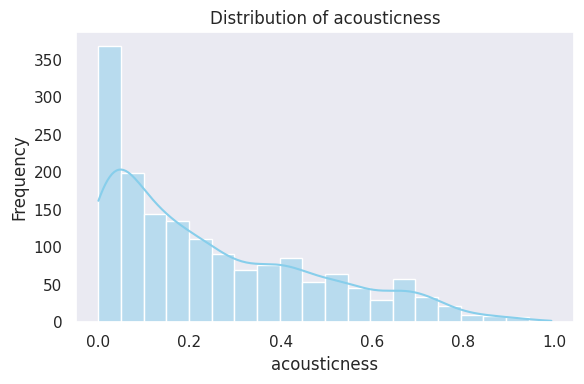

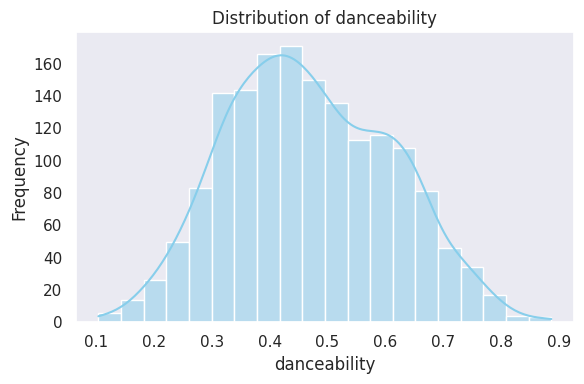

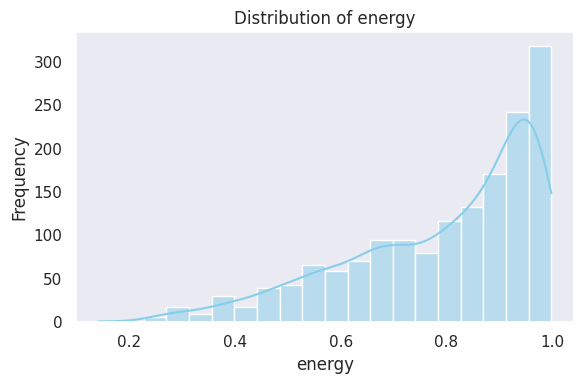

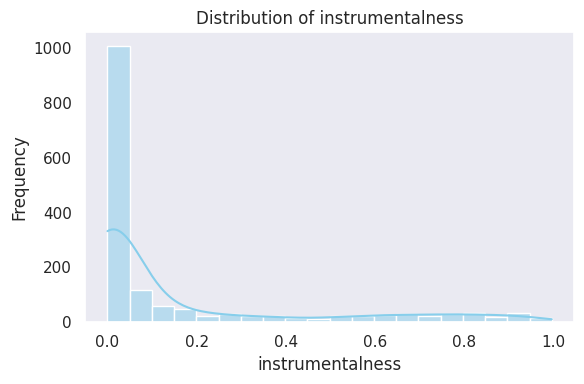

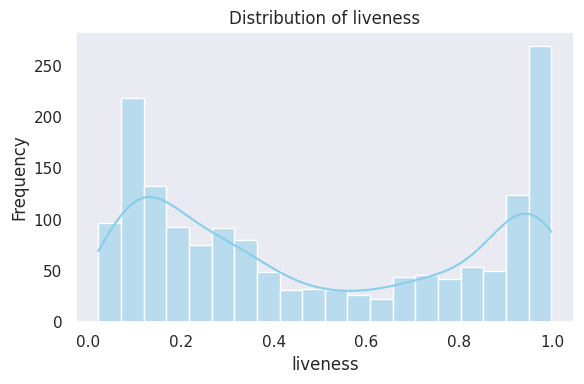

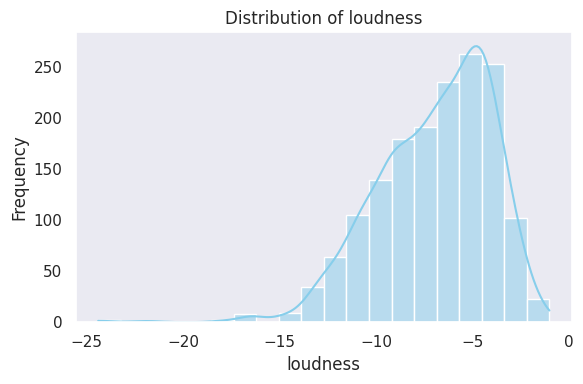

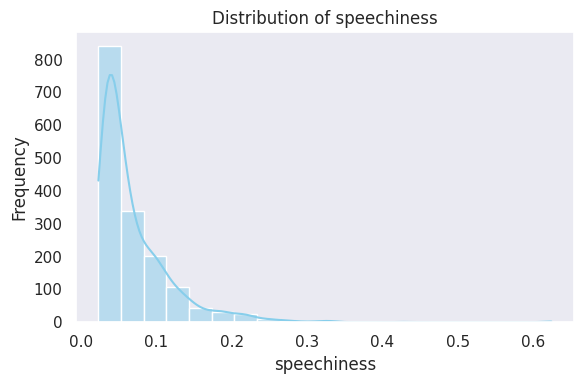

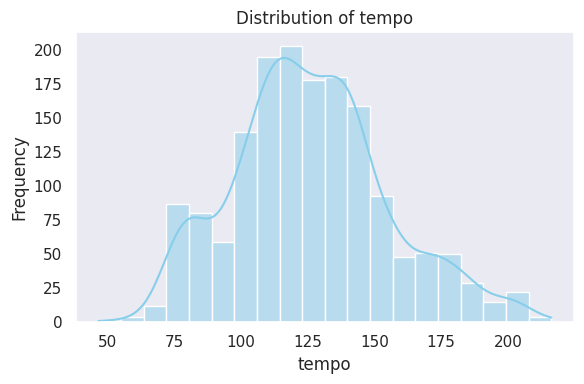

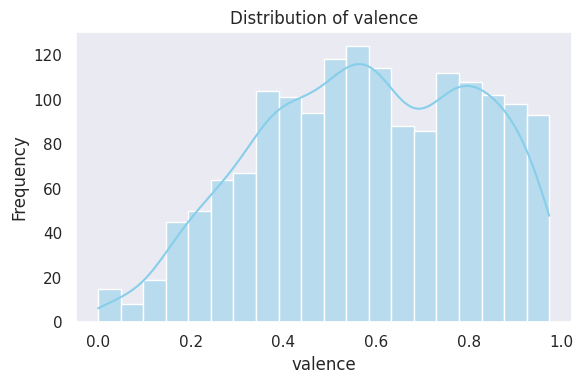

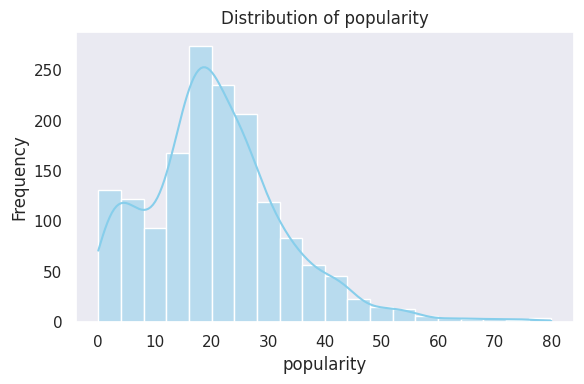

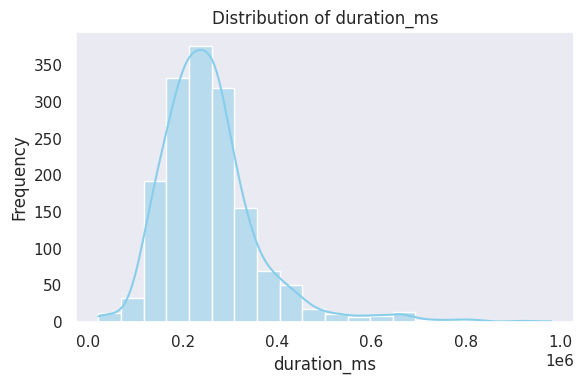

In [ ]:
# Set up the plotting style
sns.set(style="dark")

# Histograms for each feature
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(spotify_df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f"{feature}_histogram.png")

**Observations**
*   Energy: Most songs are highly energetic.
*   Danceability: Moderate to high danceability is common.
*   Valence: Emotional positivity varies widely
*   Loudness: Songs tend to be loud, typical of rock music
*   Tempo: A broad range of tempos, with some clustering around 120 BPM.

In [ ]:
# Normalize the loudness feature of spotify_df dataframe using MinMax scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
spotify_df['loudness'] = scaler.fit_transform(spotify_df[['loudness']])


**1.d Identify outliers**

In [ ]:
def detect_outliers(df, features):
    """
    Detects outliers in the given features using the IQR method.
    Returns a dictionary with feature names as keys and indices of outliers as values.
    """
    outliers_dict = {}

    for feature in features:
        Q1 = df[feature].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[feature].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        outliers_dict[feature] = outliers.tolist()

    return outliers_dict

# Detect outliers in the features
outliers = detect_outliers(spotify_df_clean, features)

# Print outliers for each feature
for feature, indices in outliers.items():
    print(f"Feature: {feature}")
    print(f"Outlier indices: {indices}\n")



Feature: acousticness
Outlier indices: [165, 807, 818, 997]

Feature: danceability
Outlier indices: []

Feature: energy
Outlier indices: [807, 818, 1115, 1118, 1313, 1325, 1333, 1369]

Feature: instrumentalness
Outlier indices: [0, 18, 20, 22, 40, 42, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 84, 85, 89, 90, 91, 103, 104, 105, 107, 108, 111, 117, 118, 121, 122, 124, 151, 154, 157, 158, 161, 163, 164, 166, 167, 168, 185, 243, 253, 259, 261, 264, 269, 279, 281, 307, 309, 335, 336, 350, 353, 357, 359, 364, 367, 371, 375, 377, 382, 385, 389, 392, 396, 400, 404, 405, 415, 432, 439, 441, 445, 465, 467, 546, 548, 550, 551, 552, 553, 554, 556, 558, 579, 592, 597, 607, 625, 660, 698, 712, 739, 740, 749, 751, 756, 757, 766, 768, 773, 785, 805, 807, 818, 825, 827, 828, 835, 837, 838, 850, 853, 854, 878, 879, 883, 884, 888, 889, 894, 896, 897, 899, 904, 906, 907, 909, 926, 928, 929, 931, 947, 963, 965, 981, 1017, 1019, 1020, 1021, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1035, 1037,

In [ ]:
#groupby the data by albums
album_df = spotify_df.groupby(['album'])
album_df.head()


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,0.491365,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,0.838035,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,0.832350,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,0.806745,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,0.825425,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1598,Route 66,The Rolling Stones,1964-04-16,1,1FRP8d6l2jm3DS5f78ZrhK,spotify:track:1FRP8d6l2jm3DS5f78ZrhK,0.2960,0.671,0.725,0.000220,0.0889,0.613106,0.0650,85.270,0.9560,51,140400
1599,1599,I Just Want To Make Love To You - Mono Version,The Rolling Stones,1964-04-16,2,7j96wehhMtN0fkVvFhD8Ix,spotify:track:7j96wehhMtN0fkVvFhD8Ix,0.2190,0.657,0.825,0.845000,0.3540,0.661195,0.0980,126.817,0.5820,34,137666
1600,1600,Honest I Do,The Rolling Stones,1964-04-16,3,22Bvku5X3odiXj2wbtgY4T,spotify:track:22Bvku5X3odiXj2wbtgY4T,0.1510,0.646,0.374,0.651000,0.2080,0.585706,0.1030,87.593,0.4750,31,129800
1601,1601,Mona (I Need You Baby),The Rolling Stones,1964-04-16,4,1o2wswWx1RkkNuVp6Z21HC,spotify:track:1o2wswWx1RkkNuVp6Z21HC,0.0688,0.695,0.684,0.000257,0.0981,0.617252,0.1330,99.014,0.4270,33,214693


**3. Perform exploratory Data Analysis**

In [ ]:
# Need the unique name of each album in spotify_df
album_names = spotify_df['album'].unique()

# Convert to DataFrame
album_table = pd.DataFrame(album_names, columns=['Album Name'])

# Print as table
print(album_table)




                     Album Name
0            Licked Live In NYC
1        Live At The El Mocambo
2     Tattoo You (Super Deluxe)
3                    Tattoo You
4          A Bigger Bang (Live)
..                          ...
85                       12 x 5
86                       12 X 5
87   England’s Newest Hitmakers
88  England's Newest Hit Makers
89           The Rolling Stones

[90 rows x 1 columns]


In [ ]:

# Access album names from rows 85 and 86
album_85 = album_table.iloc[85]['Album Name']
album_86 = album_table.iloc[86]['Album Name']

# Print both names
print("Album 85:", album_85)
print("Album 86:", album_86)



Album 85: 12 x 5
Album 86: 12 X 5


In [ ]:
album_85

'12 x 5'

In [ ]:
album_names
type(album_names)

numpy.ndarray

In [ ]:
album_names.shape

(90,)

**1.e Identify Duplicates**

In [ ]:
# Levenshtein distance function
def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)

    previous_row = list(range(len(s2) + 1))
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]

# Calculate distances
results = []
for i in range(len(album_names)):
    for j in range(i + 1, len(album_names)):
        dist = levenshtein_distance(album_names[i], album_names[j])
        results.append({
            "Album 1": album_names[i],
            "Album 2": album_names[j],
            "Levenshtein Distance": dist
        })

# Convert to DataFrame
album_name_compare_df = pd.DataFrame(results)
print(album_name_compare_df)


                          Album 1                      Album 2  \
0              Licked Live In NYC       Live At The El Mocambo   
1              Licked Live In NYC    Tattoo You (Super Deluxe)   
2              Licked Live In NYC                   Tattoo You   
3              Licked Live In NYC         A Bigger Bang (Live)   
4              Licked Live In NYC            Steel Wheels Live   
...                           ...                          ...   
4000                       12 X 5  England's Newest Hit Makers   
4001                       12 X 5           The Rolling Stones   
4002   England’s Newest Hitmakers  England's Newest Hit Makers   
4003   England’s Newest Hitmakers           The Rolling Stones   
4004  England's Newest Hit Makers           The Rolling Stones   

      Levenshtein Distance  
0                       17  
1                       22  
2                       17  
3                       16  
4                       15  
...                    ...  
4000

In [ ]:
# Show Album1 and Album2 names when the Levenshtein distance is less than 5
album_name_compare_df[album_name_compare_df['Levenshtein Distance'] < 6]


,Album 1,Album 2,Levenshtein Distance
462,Steel Wheels Live,Steel Wheels,5
1074,On Air,12 x 5,5
1075,On Air,12 X 5,5
2970,Love You Live (Remastered),Love You Live (Remastered 2009),5
3787,Flowers,Now!,5
3852,got LIVE if you want it!,Got Live if you want it!,4
3914,December’s Children (And Everybody’s),December's Children (and everybody's),4
3941,Out Of Our Heads,Out Of Our Heads (UK),5
3950,Out Of Our Heads (US Sequence),Out Of Our Heads (UK Sequence),1
3984,"The Rolling Stones, Now!",The Rolling Stones No. 2,4


In [ ]:
#show all the songs from Steel Wheels LIve
#spotify_df[spotify_df['album'] == '12 X 5']

In [ ]:
#show all the songs from Steel Wheels LIve
#spotify_df[spotify_df['album'] == 'Out Of Our Heads (US Sequence)']

In [ ]:
#show all the songs from Steel Wheels LIve
#spotify_df[spotify_df['album'] == 'Out Of Our Heads (UK Sequence)']

In [ ]:
#show all the songs from Steel Wheels LIve
#spotify_df[spotify_df['album'] == 'Out Of Our Heads']

In [ ]:
#show all the songs from Steel Wheels LIve
#spotify_df[spotify_df['album'] == 'Out Of Our Heads (UK)']

In [ ]:
#show all the songs from December’s Children (And Everybody’s)
#spotify_df[spotify_df['album'] == 'December’s Children (And Everybody’s)']

In [ ]:
#show all the songs from December’s Children (And Everybody’s)
#spotify_df[spotify_df['album'] == 'December’s Children (and everybody’s)']

In [ ]:
#show all the songs from December’s Children (And Everybody’s)
#spotify_df[spotify_df['album'] == 'got LIVE if you want it!']


In [ ]:
#show all the songs from December’s Children (And Everybody’s)
#spotify_df[spotify_df['album'] == 'Got Live if you want it!']

In [ ]:
#show all the songs from December’s Children (And Everybody’s)
#spotify_df[spotify_df['album'] == 'Love You Live (Remastered)']


In [ ]:
#show all the songs from December’s Children (And Everybody’s)
#spotify_df[spotify_df['album'] == 'Love You Live (Remastered 2009)']


In [ ]:
#show all the songs from Steel Wheels LIve
#spotify_df[spotify_df['album'] == 'Steel Wheels Live']

In [ ]:
#show all the songs from Steel Wheels
#spotify_df[spotify_df['album'] == 'Steel Wheels']

**2. Refine data**

In [ ]:
# drop all the songs of the album 'Steel Wheel'
spotify_df = spotify_df[spotify_df['album'] != 'Out Of Our Heads (UK)']
spotify_df = spotify_df[spotify_df['album'] != 'Out Of Our Heads (UK Sequence)']
spotify_df = spotify_df[spotify_df['album'] != 'Out Of Our Heads (US Sequence)']
spotify_df = spotify_df[spotify_df['album'] != 'Love You Live (Remastered 2009)']



In [ ]:
# Calculate the number of unique albums in the spotify_df dataset
len(spotify_df['album'].unique())

86

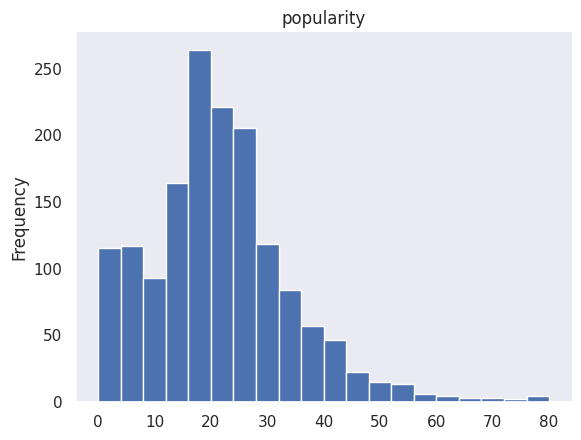

In [ ]:
# @title popularity

spotify_df['popularity'].plot(kind='hist', bins=20, title='popularity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# create group by popularity ascending order and take the top 50
top_50_popularity = spotify_df.sort_values(by='popularity', ascending=False).head(50)
top_50_popularity.shape


(50, 18)

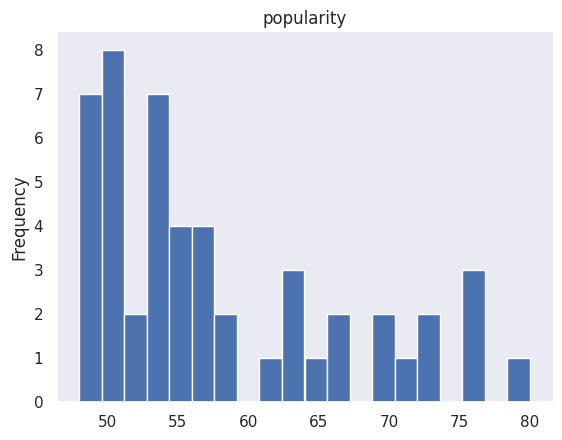

In [ ]:

top_50_popularity['popularity'].plot(kind='hist', bins=20, title='popularity')
plt.gca().spines[['top', 'right',]].set_visible(False)

**3.a. Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album**

In [ ]:
# FInd out which album has the most songs in the list
top_50_popularity_album =top_50_popularity['album'].value_counts()

# Print the top 2 albums with highest popularity
top_50_popularity_album.head(2)



,count
album,
Sticky Fingers (Remastered),6
Let It Bleed,5


In [ ]:
top_50_popularity.shape


(50, 18)

**3.c Examine the relationship between songs popularity and various factors**

Top 2 albums with the most popular songs:
album
Sticky Fingers (Remastered)    3
Let It Bleed                   2
Name: count, dtype: int64


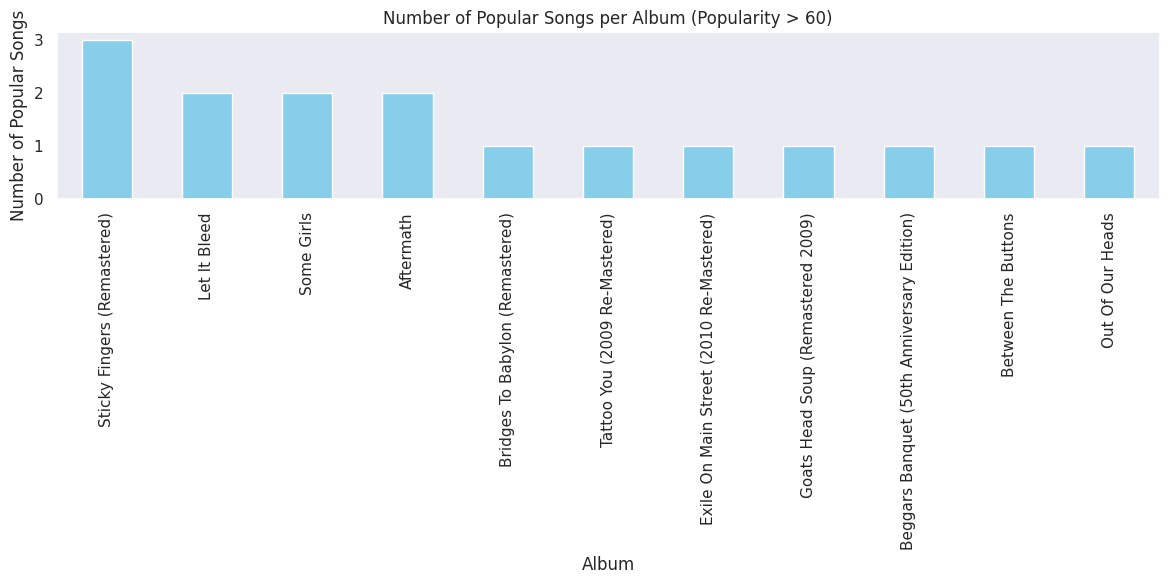

In [ ]:
# Define popular songs as those with a popularity score above 80
popular_songs = spotify_df[spotify_df['popularity'] > 60]

# Count the number of popular songs per album
popular_counts = popular_songs['album'].value_counts()

# Identify the top 2 albums with the most popular songs
top_2_albums = popular_counts.head(2)

# Plot the number of popular songs per album
plt.figure(figsize=(12, 6))
popular_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Popular Songs per Album (Popularity > 60)')
plt.xlabel('Album')
plt.ylabel('Number of Popular Songs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("popular_songs_per_album.png")

# Display the top 2 albums
print("Top 2 albums with the most popular songs:")
print(top_2_albums)


In [ ]:
#popular_songs

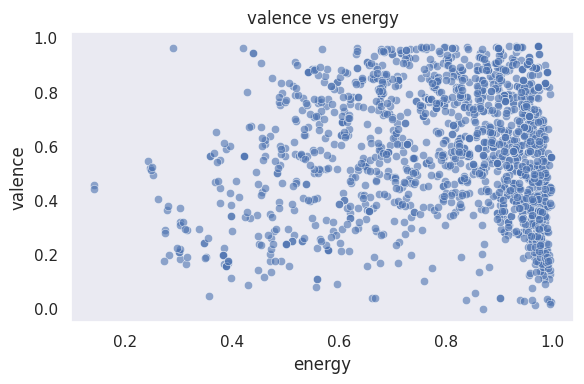

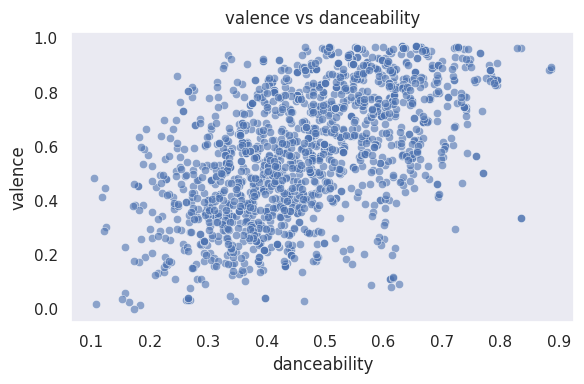

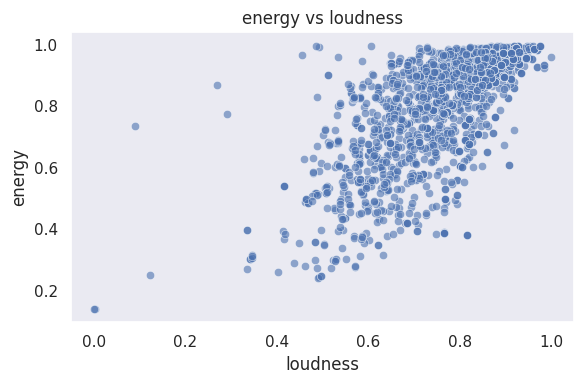

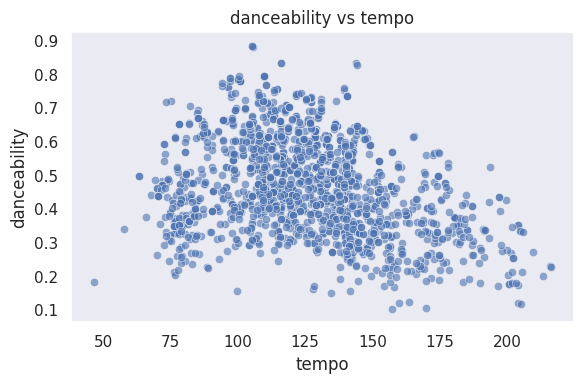

In [ ]:
# Scatter plots to explore relationships
scatter_pairs = [
    ('energy', 'valence'),
    ('danceability', 'valence'),
    ('loudness', 'energy'),
    ('tempo', 'danceability')
]
for x, y in scatter_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=spotify_df, x=x, y=y, alpha=0.6)
    plt.title(f'{y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.savefig(f"{y}_vs_{x}_scatter.png")

**Feature Relationships**


*   Energy vs. Valence: Slight positive correlation—more energetic songs tend to be more positive.
*   Danceability vs. Valence: Positive correlation—danceable songs are often more cheerful.
*   Energy vs. Loudness: Strong correlation—louder songs are more energetic.
*   Danceability vs. Tempo: No strong pattern, but some clustering..



Exploratory data analysis completed. Visualizations saved as PNG files.


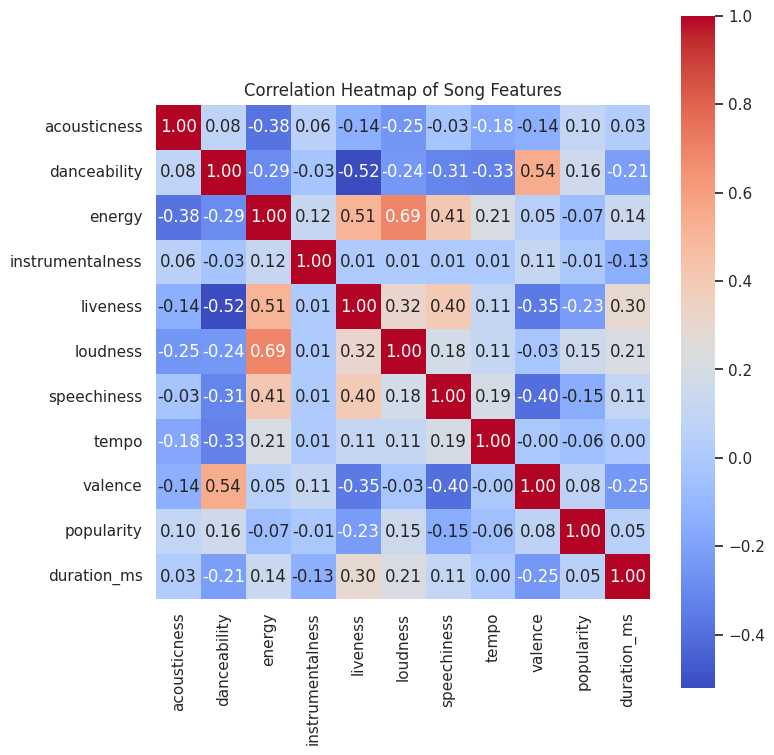

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 8))
corr_matrix = spotify_df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Song Features')
plt.tight_layout()
plt.savefig("correlation_heatmap.png")

print("Exploratory data analysis completed. Visualizations saved as PNG files.")


Observations


*   The maximum positive correlation coeeficient is 0.69 (loudness vs energy)
*   The maximum negative correlation is -0.52 (liveness vs danceability)
*   None of the factors a super correlated - CANNOT Drop any factor




**3.d Perform Principal COmponent Analysis**

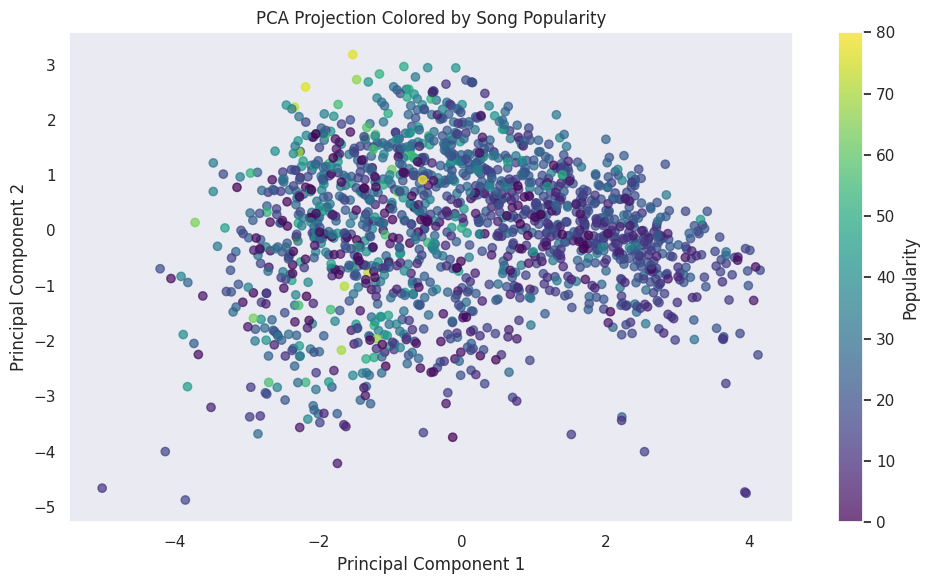

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(spotify_df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA components and popularity
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['popularity'] = spotify_df['popularity'].values

# Plot PCA components colored by popularity
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['popularity'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Popularity')
plt.title('PCA Projection Colored by Song Popularity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.savefig("pca_popularity_projection.png")


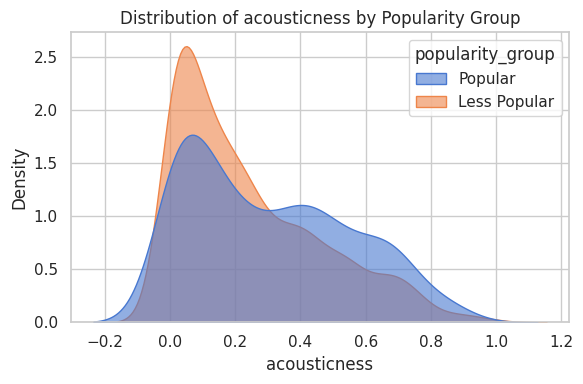

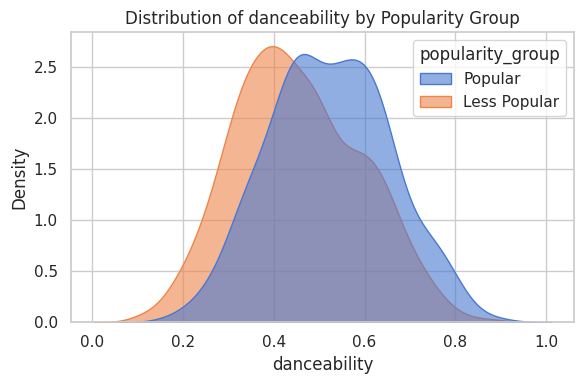

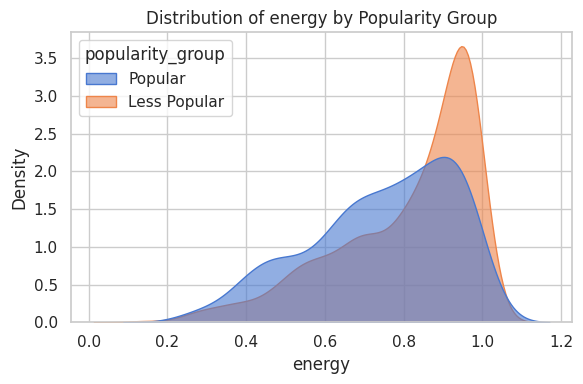

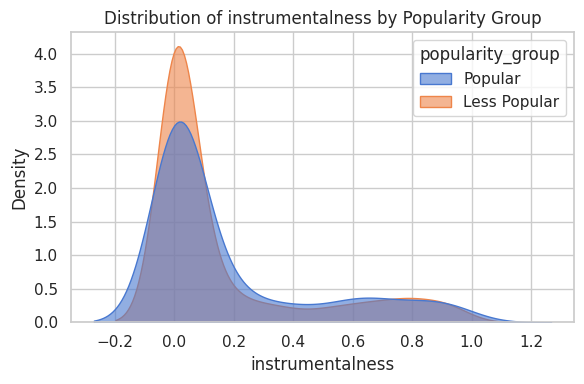

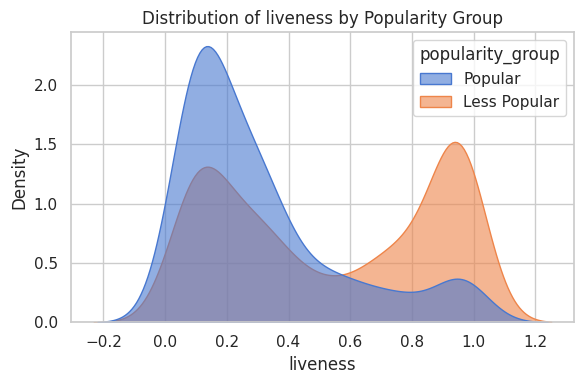

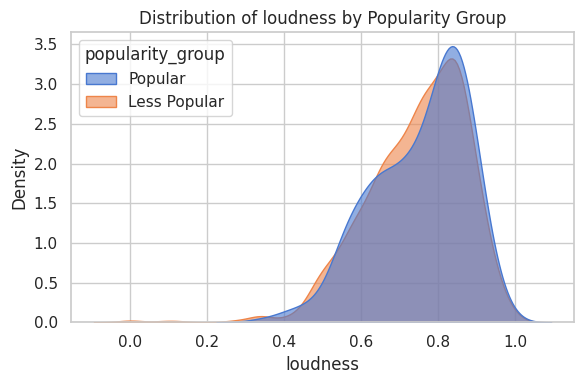

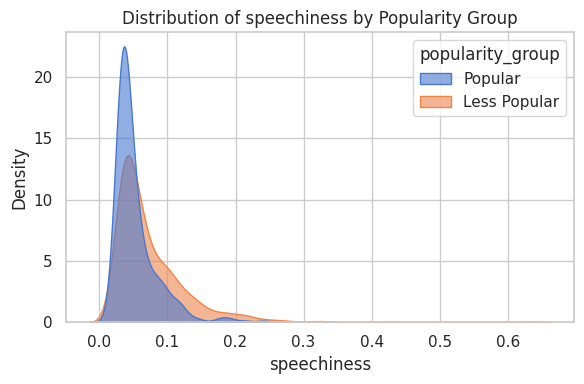

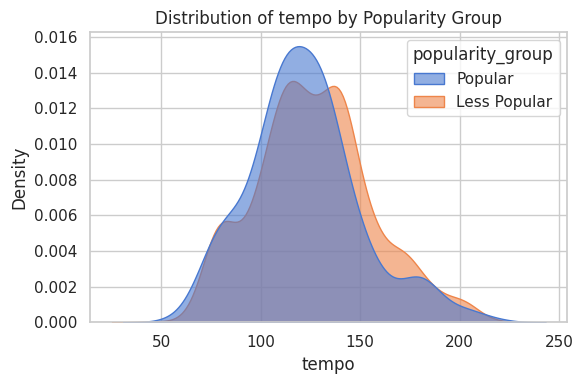

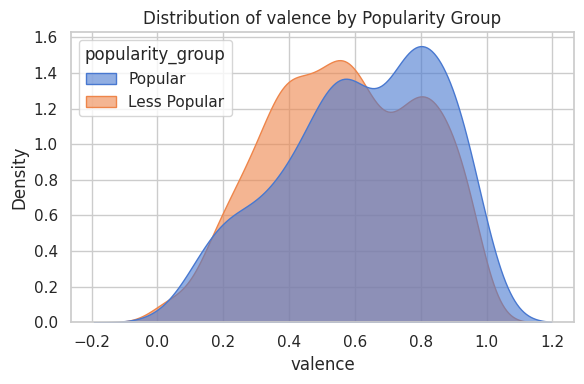

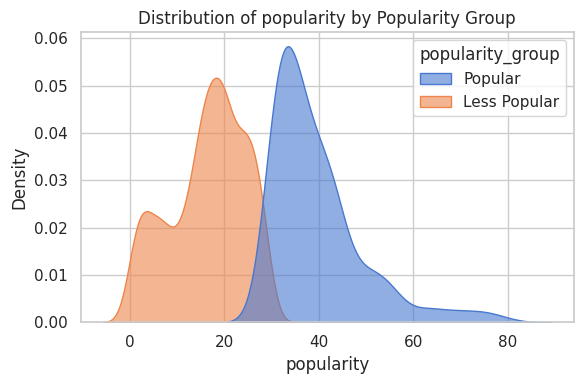

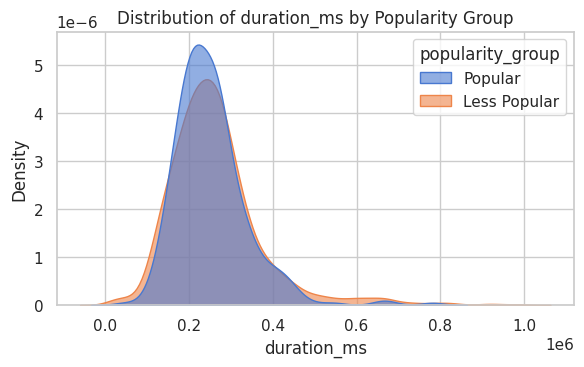

In [ ]:
# Define popularity threshold
popularity_threshold = 30

# Create a new column to categorize songs
spotify_df['popularity_group'] = spotify_df['popularity'].apply(lambda x: 'Popular' if x >= popularity_threshold else 'Less Popular')

# Set seaborn style
sns.set(style="whitegrid")

# Generate KDE plots for each feature
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=spotify_df, x=feature, hue='popularity_group', fill=True, common_norm=False, palette='muted', alpha=0.6)
    plt.title(f'Distribution of {feature} by Popularity Group')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.savefig(f"{feature}_popularity_kde.png")


**Observations:**


*   Popular Songs have slightly more danceability and valence
*   Popular songs tend to have less liveness



Cluster analysis completed.
Cluster summary saved to 'cluster_summary.csv'.


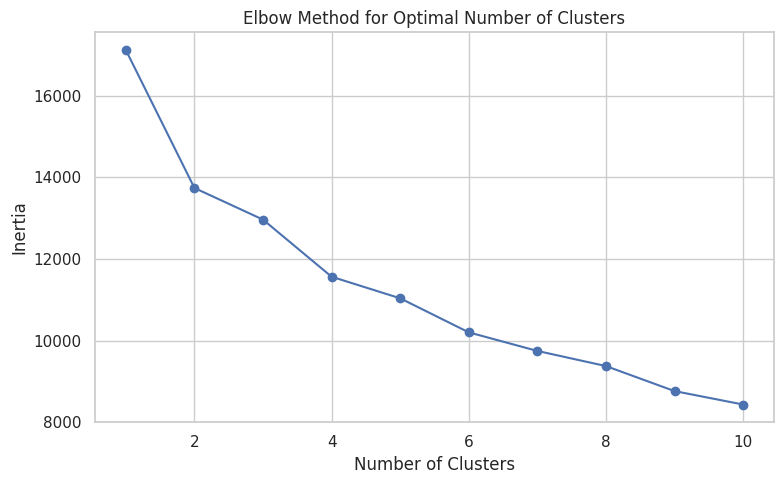

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(spotify_df[features])

# Identify the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.savefig("elbow_curve.png")

# Apply KMeans clustering with optimal number of clusters (e.g., 3 based on elbow curve)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
spotify_df['cluster'] = kmeans.fit_predict(scaled_features)

# Define each cluster based on feature averages
cluster_summary = spotify_df.groupby('cluster')[features].mean()
cluster_summary.to_csv("cluster_summary.csv")

print("Cluster analysis completed.")
print("Cluster summary saved to 'cluster_summary.csv'.")


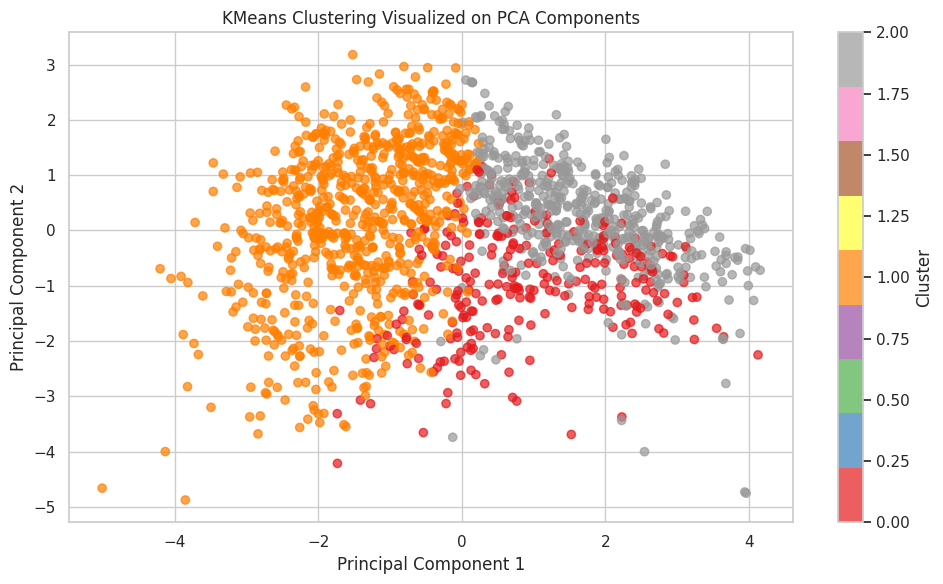

In [ ]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='Set1', alpha=0.7)
plt.title('KMeans Clustering Visualized on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.savefig("cluster_pca_visualization_3.png")


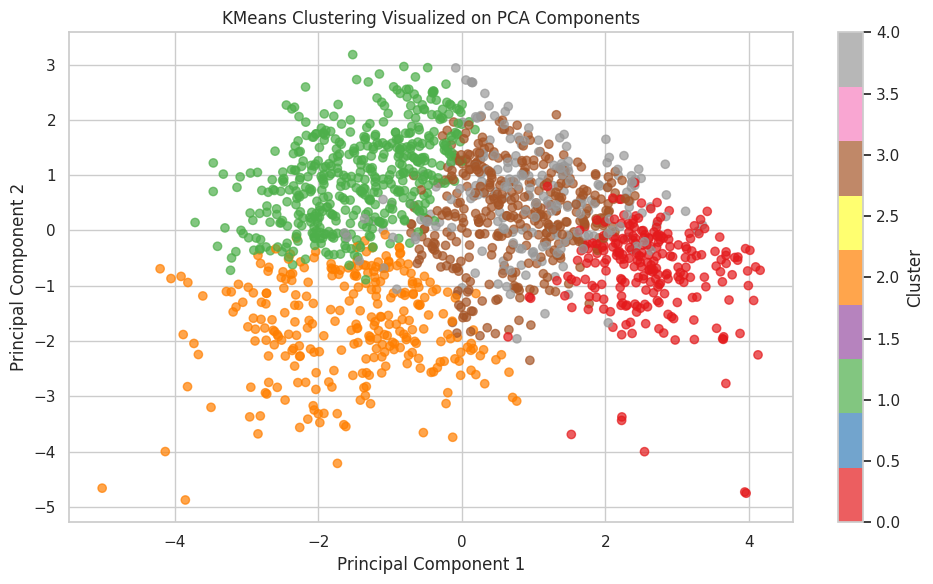

In [ ]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='Set1', alpha=0.7)
plt.title('KMeans Clustering Visualized on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.savefig("cluster_pca_visualization_5.png")


/tmp/ipython-input-3466032068.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


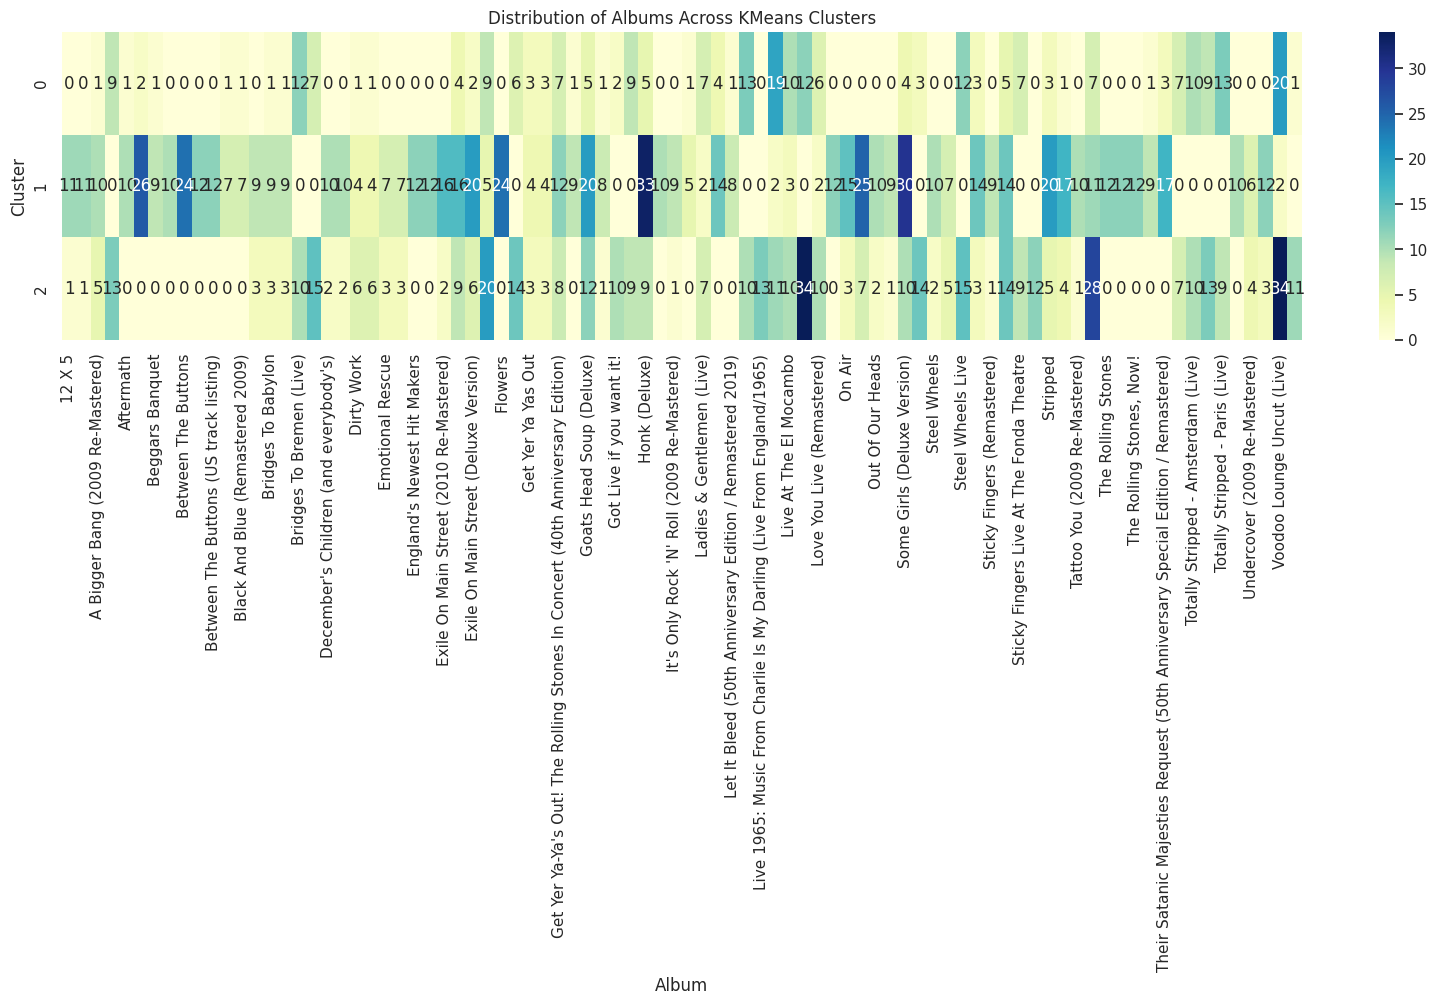

In [ ]:
# Apply KMeans clustering (assuming 3 clusters based on previous analysis)
kmeans = KMeans(n_clusters=3, random_state=42)
spotify_df['cluster'] = kmeans.fit_predict(scaled_features)

# Group by cluster and album to count songs
cluster_album_counts = spotify_df.groupby(['cluster', 'album']).size().unstack(fill_value=0)

# Plot heatmap of album distribution across clusters
plt.figure(figsize=(20, 4))
sns.heatmap(cluster_album_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Distribution of Albums Across KMeans Clusters')
plt.xlabel('Album')
plt.ylabel('Cluster')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("album_cluster_heatmap.png")


Average popularity per cluster:
cluster
0    18.766187
1    24.102199
2    17.619802
Name: popularity, dtype: float64


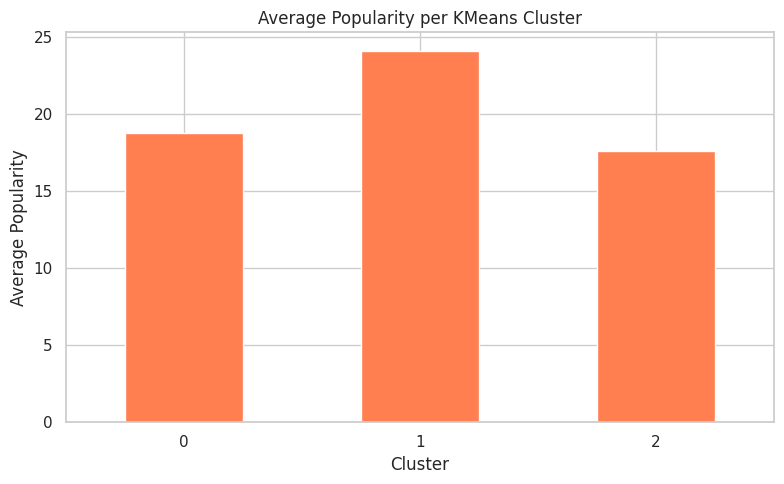

In [ ]:
# Apply KMeans clustering (assuming 3 clusters based on previous analysis)
kmeans = KMeans(n_clusters=3, random_state=42)
spotify_df['cluster'] = kmeans.fit_predict(scaled_features)

# Compute average popularity per cluster
popularity_by_cluster = spotify_df.groupby('cluster')['popularity'].mean()

# Plot the average popularity per cluster
plt.figure(figsize=(8, 5))
popularity_by_cluster.plot(kind='bar', color='coral')
plt.title('Average Popularity per KMeans Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Popularity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("cluster_popularity_bar.png")

# Display the average popularity values
print("Average popularity per cluster:")
print(popularity_by_cluster)


Average energy per cluster:
cluster
0    0.806468
1    0.698131
2    0.933489
Name: energy, dtype: float64


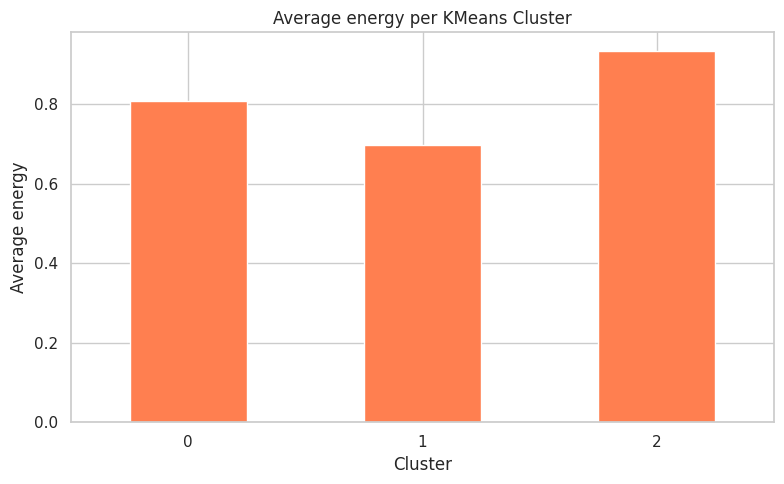

In [ ]:
# Compute average energy per cluster
energy_by_cluster = spotify_df.groupby('cluster')['energy'].mean()

# Plot the average energy per cluster
plt.figure(figsize=(8, 5))
energy_by_cluster.plot(kind='bar', color='coral')
plt.title('Average energy per KMeans Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average energy')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("cluster_energy_bar.png")

# Display the average energy values
print("Average energy per cluster:")
print(energy_by_cluster)

Average valence per cluster:
cluster
0    0.436353
1    0.682194
2    0.497988
Name: valence, dtype: float64


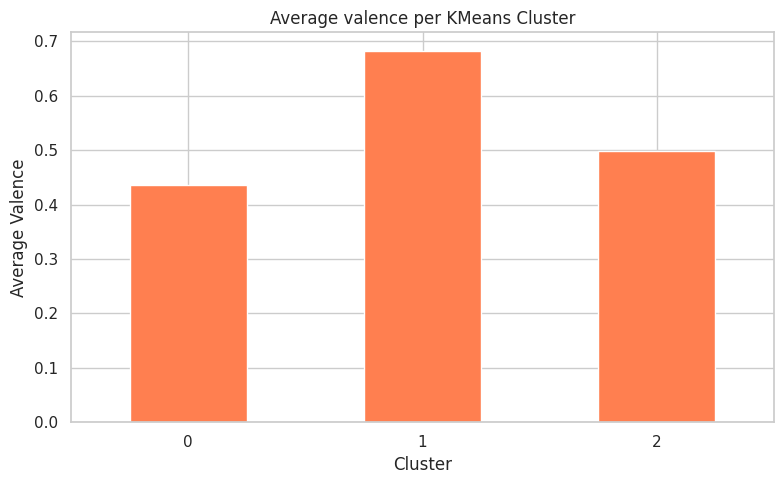

In [ ]:
# Compute average Valence per cluster
valence_by_cluster = spotify_df.groupby('cluster')['valence'].mean()

# Plot the average valence per cluster
plt.figure(figsize=(8, 5))
valence_by_cluster.plot(kind='bar', color='coral')
plt.title('Average valence per KMeans Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Valence')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("cluster_valence_bar.png")

# Display the average Valence values
print("Average valence per cluster:")
print(valence_by_cluster)

Average tempo per cluster:
cluster
0    110.416680
1    120.133234
2    143.044085
Name: tempo, dtype: float64


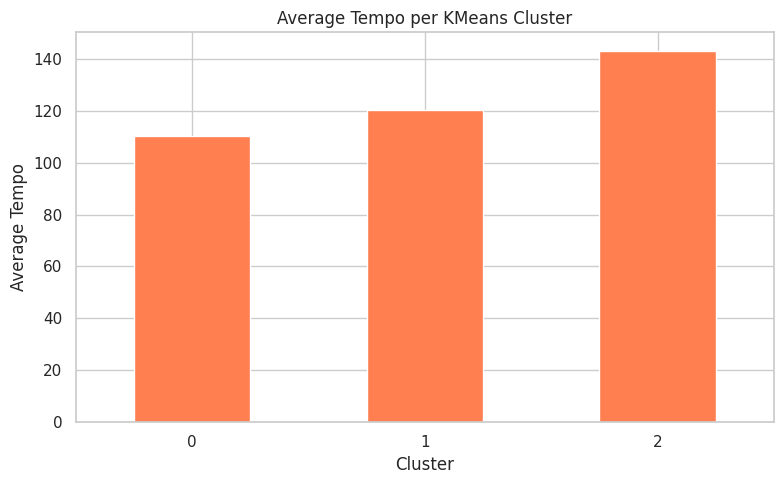

In [ ]:
# Compute average Tempo per cluster
tempo_by_cluster = spotify_df.groupby('cluster')['tempo'].mean()

# Plot the average Tempo per cluster
plt.figure(figsize=(8, 5))
tempo_by_cluster.plot(kind='bar', color='coral')
plt.title('Average Tempo per KMeans Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Tempo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("cluster_tempo_bar.png")

# Display the average Valence values
print("Average tempo per cluster:")
print(tempo_by_cluster)

Average danceability per cluster:
cluster
0    0.403191
1    0.558708
2    0.362263
Name: danceability, dtype: float64


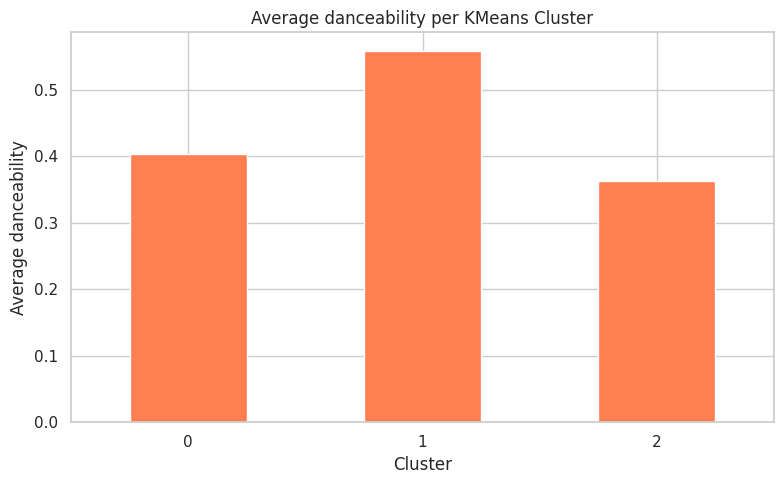

In [ ]:
# Compute average Dancebaility per cluster
danceability_by_cluster = spotify_df.groupby('cluster')['danceability'].mean()

# Plot the average danceability per cluster
plt.figure(figsize=(8, 5))
danceability_by_cluster.plot(kind='bar', color='coral')
plt.title('Average danceability per KMeans Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average danceability')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("cluster_danceability_bar.png")

# Display the average Valence values
print("Average danceability per cluster:")
print(danceability_by_cluster)

In [ ]:
#define each cluster based on dominant features
cluster_summary = spotify_df.groupby('cluster')[features].mean()
cluster_summary.to_csv("cluster_summary.csv")
#Identify the dominant features of cluster1
cluster1_dominant_features = cluster_summary.loc[1].sort_values(ascending=False).head(4)
print("Dominant features of Cluster 1:")
print(cluster1_dominant_features)

#Identify the dominant features of cluster0
cluster0_dominant_features = cluster_summary.loc[0].sort_values(ascending=False).head(4)
print("Dominant features of Cluster 0:")
print(cluster0_dominant_features)

Dominant features of Cluster 1:
duration_ms    222946.345408
tempo             120.133234
popularity         24.102199
energy              0.698131
Name: 1, dtype: float64
Dominant features of Cluster 0:
duration_ms    392554.780576
tempo             110.416680
popularity         18.766187
energy              0.806468
Name: 0, dtype: float64


**Observation**

*   Cluster 0 - Low Tempo, Low Valnece - Melody songs
*   Cluster 1 - High Valence, high danceability, high popularity - Popular Dance songs
*   Cluster 2 - High Tempo, high Energy - Rock songs



In [ ]:
#List all albums in Cluster0
cluster0_albums = spotify_df[spotify_df['cluster'] == 0]['album'].unique()
print("Albums in Cluster 0:")
print(cluster0_albums)

Albums in Cluster 0:
['Licked Live In NYC' 'Live At The El Mocambo' 'Tattoo You (Super Deluxe)'
 'Tattoo You' 'A Bigger Bang (Live)' 'Steel Wheels Live'
 'Goats Head Soup (Deluxe)' 'Bridges To Buenos Aires (Live)'
 'Bridges To Bremen (Live)' 'Honk (Deluxe)' 'Voodoo Lounge Uncut (Live)'
 'From The Vault: No Security - San Jose 1999 (Live)'
 'Sticky Fingers Live At The Fonda Theatre' 'Ladies & Gentlemen (Live)'
 'Havana Moon (Live)' 'Totally Stripped - Brixton (Live)'
 'Totally Stripped - Amsterdam (Live)' 'Totally Stripped (Live)'
 'Totally Stripped - Paris (Live)' 'Live At The Checkerboard Lounge'
 "Some Girls: Live In Texas '78" 'A Bigger Bang (2009 Re-Mastered)'
 'Live Licks' 'Bridges To Babylon' 'Bridges To Babylon (Remastered)'
 'Stripped' 'Flashpoint' 'Dirty Work' 'Dirty Work (Remastered 2009)'
 'Some Girls (Deluxe Version)' 'Love You Live (Remastered)'
 'Black And Blue (Remastered 2009)' 'Black And Blue'
 'Goats Head Soup (Remastered 2009)' 'Goats Head Soup'
 'Exile On Main Stree

In [ ]:
#List all albums in Cluster1
cluster1_albums = spotify_df[spotify_df['cluster'] == 0]['album'].unique()
print("Albums in Cluster 1:")
print(cluster1_albums)

Albums in Cluster 1:
['Licked Live In NYC' 'Live At The El Mocambo' 'Tattoo You (Super Deluxe)'
 'Tattoo You' 'A Bigger Bang (Live)' 'Steel Wheels Live'
 'Goats Head Soup (Deluxe)' 'Bridges To Buenos Aires (Live)'
 'Bridges To Bremen (Live)' 'Honk (Deluxe)' 'Voodoo Lounge Uncut (Live)'
 'From The Vault: No Security - San Jose 1999 (Live)'
 'Sticky Fingers Live At The Fonda Theatre' 'Ladies & Gentlemen (Live)'
 'Havana Moon (Live)' 'Totally Stripped - Brixton (Live)'
 'Totally Stripped - Amsterdam (Live)' 'Totally Stripped (Live)'
 'Totally Stripped - Paris (Live)' 'Live At The Checkerboard Lounge'
 "Some Girls: Live In Texas '78" 'A Bigger Bang (2009 Re-Mastered)'
 'Live Licks' 'Bridges To Babylon' 'Bridges To Babylon (Remastered)'
 'Stripped' 'Flashpoint' 'Dirty Work' 'Dirty Work (Remastered 2009)'
 'Some Girls (Deluxe Version)' 'Love You Live (Remastered)'
 'Black And Blue (Remastered 2009)' 'Black And Blue'
 'Goats Head Soup (Remastered 2009)' 'Goats Head Soup'
 'Exile On Main Stree

In [ ]:
#List all albums in Cluster2
cluster2_albums = spotify_df[spotify_df['cluster'] == 0]['album'].unique()
print("Albums in Cluster 2:")
print(cluster2_albums)

Albums in Cluster 2:
['Licked Live In NYC' 'Live At The El Mocambo' 'Tattoo You (Super Deluxe)'
 'Tattoo You' 'A Bigger Bang (Live)' 'Steel Wheels Live'
 'Goats Head Soup (Deluxe)' 'Bridges To Buenos Aires (Live)'
 'Bridges To Bremen (Live)' 'Honk (Deluxe)' 'Voodoo Lounge Uncut (Live)'
 'From The Vault: No Security - San Jose 1999 (Live)'
 'Sticky Fingers Live At The Fonda Theatre' 'Ladies & Gentlemen (Live)'
 'Havana Moon (Live)' 'Totally Stripped - Brixton (Live)'
 'Totally Stripped - Amsterdam (Live)' 'Totally Stripped (Live)'
 'Totally Stripped - Paris (Live)' 'Live At The Checkerboard Lounge'
 "Some Girls: Live In Texas '78" 'A Bigger Bang (2009 Re-Mastered)'
 'Live Licks' 'Bridges To Babylon' 'Bridges To Babylon (Remastered)'
 'Stripped' 'Flashpoint' 'Dirty Work' 'Dirty Work (Remastered 2009)'
 'Some Girls (Deluxe Version)' 'Love You Live (Remastered)'
 'Black And Blue (Remastered 2009)' 'Black And Blue'
 'Goats Head Soup (Remastered 2009)' 'Goats Head Soup'
 'Exile On Main Stree